In [14]:
import argparse
import logging
import os
import time
from logging import Logger
from typing import List

import numpy as np

from symb_regression.config import GeneticParams
from symb_regression.core import GeneticProgram
from symb_regression.core.tree import Node
from symb_regression.utils.plotting import (
    plot_evolution_metrics,
    plot_prediction_analysis,
    plot_expression_tree
)
from symb_regression.utils.data_handler import load_data
from symb_regression.utils.logging_config import setup_logger
from symb_regression.utils.metrics import Metrics
import matplotlib.pyplot as plt

In [15]:
def print_section_header(title: str, logger: Logger | None = None):
    if logger is not None:
        logger.info("=" * 50)
        logger.info(f" {title} ".center(50, "="))
        logger.info("=" * 50)
        return
    else:
        print("\n" + "=" * 50)
        print(f" {title} ".center(50, "="))
        print("=" * 50)


def print_section_footer(logger: Logger | None = None):
    if logger is not None:
        logger.info("=" * 50 + "\n")
    else:
        print("=" * 50 + "\n")

In [16]:
def run_symbolic_regression(
    x: np.ndarray,
    y: np.ndarray,
    params: GeneticParams | None = None,
    debug: bool = False,
) -> tuple[Node, List[Metrics]]:
    logger: Logger = logging.getLogger("symb_regression")

    if params is None:
        params = GeneticParams(
            tournament_size=7,
            mutation_prob=0.4,
            crossover_prob=0.8,
            elitism_count=5,
            population_size=1000,
            generations=300,
            max_depth=5,
            min_depth=1,
        )

    if debug:
        logger.debug("Genetic Programming Parameters:")
        for key, value in params.__dict__.items():
            logger.debug(f"{key}: {value}")

    gp = GeneticProgram(params)

    logger.info("Starting evolution...")
    start_time = time.perf_counter()

    try:
        best_solution, history = gp.evolve(x, y)

        end_time = time.perf_counter()
        execution_time = end_time - start_time

        # Use print for better visibility of results
        print_section_header("SYMBOLIC REGRESSION RESULTS")
        print(f"Best Expression Found: {best_solution.to_pretty_string()}")
        print(f"Final Fitness: {gp.calculate_fitness(best_solution, x, y):g}")
        print(f"Execution Time: {execution_time:.2f} seconds")
        print(f"Generations: {len(history)}")
        print_section_footer()

        # Plot the evolution progress

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        plot_evolution_metrics(history, ax=axs[0])

        mse, r2 = plot_prediction_analysis(best_solution, x, y, ax=axs[1])

        plt.tight_layout()
        plt.show()

        print("Performance Metrics:")
        print(f"Mean Squared Error: {mse:.6f}")
        print(f"R² Score: {r2:.6f} ({r2*100:.1f}% of variance explained)")

        plot_expression_tree(best_solution)

        return best_solution, history

    except Exception as e:
        logger.error(f"Evolution failed: {e}")
        raise


Data Statistics:
X shape: (5000, 2), Y shape: (5000,)
Number of variables: 2

Variable x0:
  Range: [-2.000, 1.999]
  Mean: 0.007
  Std: 1.150
  Correlation with y: -0.004

Variable x1:
  Range: [-1.997, 1.999]
  Mean: -0.012
  Std: 1.158
  Correlation with y: 0.000

Target y:
  Range: [1.300, 508.418]
  Mean: 10.230
  Std: 26.668


Evolution progress:   0%|          | 0/300 [00:00<?, ?gen/s]

Evolution progress:  20%|█▉        | 59/300 [00:08<00:26,  8.96gen/s, Best fitness: 0.0020]

No improvement for 10 generations, injecting diversity...


Evolution progress:  23%|██▎       | 69/300 [00:10<00:59,  3.88gen/s, Best fitness: 0.0020]

No improvement for 10 generations, injecting diversity...


Evolution progress:  27%|██▋       | 80/300 [00:13<01:02,  3.53gen/s, Best fitness: 0.0020]

No improvement for 10 generations, injecting diversity...


Evolution progress:  30%|███       | 91/300 [00:16<01:00,  3.47gen/s, Best fitness: 0.0020]

No improvement for 10 generations, injecting diversity...


Evolution progress:  34%|███▍      | 102/300 [00:19<00:52,  3.77gen/s, Best fitness: 0.0020]

No improvement for 10 generations, injecting diversity...


Evolution progress:  38%|███▊      | 113/300 [00:22<00:50,  3.73gen/s, Best fitness: 0.0020]

No improvement for 10 generations, injecting diversity...


Evolution progress:  54%|█████▍    | 163/300 [00:43<01:06,  2.07gen/s, Best fitness: 0.0038]

No improvement for 10 generations, injecting diversity...


Evolution progress:  66%|██████▋   | 199/300 [01:06<01:19,  1.26gen/s, Best fitness: 0.0041]

No improvement for 10 generations, injecting diversity...


Evolution progress:  70%|██████▉   | 209/300 [01:14<01:10,  1.29gen/s, Best fitness: 0.0041]

No improvement for 10 generations, injecting diversity...


Evolution progress:  96%|█████████▌| 288/300 [02:32<00:05,  2.11gen/s, Best fitness: 0.0046]

No improvement for 10 generations, injecting diversity...


Evolution progress: 100%|█████████▉| 299/300 [02:37<00:00,  2.18gen/s, Best fitness: 0.0046]

No improvement for 10 generations, injecting diversity...


Evolution progress: 100%|██████████| 300/300 [02:37<00:00,  1.90gen/s, Best fitness: 0.0046]


========== SYMBOLIC REGRESSION RESULTS ===========
Best Expression Found: cosh(exp(x1 abs_diff x0 / sinh(x0) abs_diff x1 / x0 // x1 min x1 / arcsin(x1) min sqrt(arcsin(abs(x0)) max cosh(x0))))
Final Fitness: 0.00462643
Execution Time: 157.81 seconds
Generations: 300



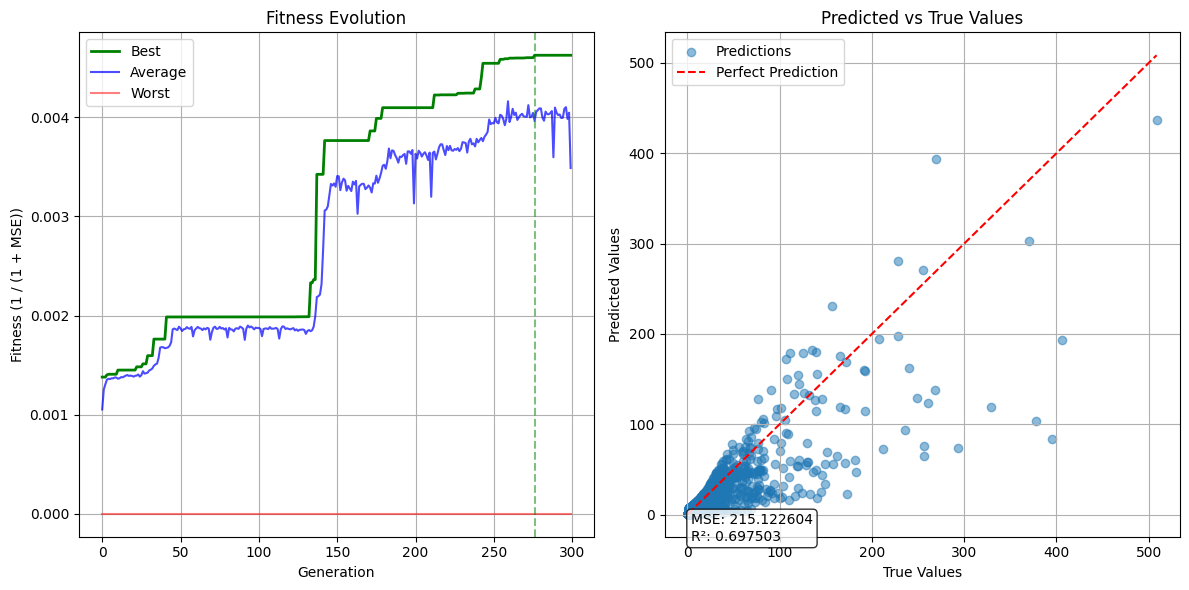

Performance Metrics:
Mean Squared Error: 215.122604
R² Score: 0.697503 (69.8% of variance explained)


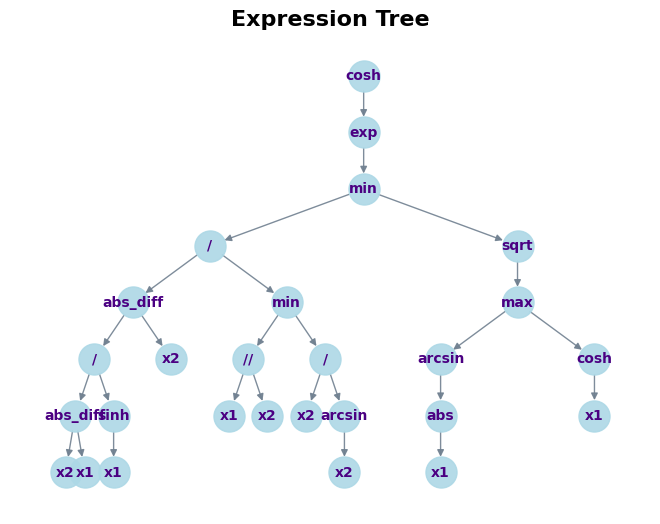

(<symb_regression.core.tree.Node at 0x213f2f45070>,
 [Metrics(generation=0, execution_time=0.08603900001617149, best_fitness=np.float64(0.0013792919495240418), avg_fitness=np.float64(0.0010525555076916259), worst_fitness=np.float64(4.807705674317218e-40), fitness_std=np.float64(0.00041244706331333426), best_expression='<symb_regression.core.tree.Node object at 0x00000213F5ABBEF0>', population_diversity=1.0, operator_distribution={'Node': 1.0}, avg_tree_size=np.float64(4.256), avg_tree_depth=np.float64(1.81), min_tree_size=1, max_tree_size=38, eval_time=0.04949600005056709, evolution_time=0.08303800004068762),
  Metrics(generation=1, execution_time=0.1978400000371039, best_fitness=np.float64(0.0013792919495240418), avg_fitness=np.float64(0.0012531976792754733), worst_fitness=np.float64(1.2895569873658147e-22), fitness_std=np.float64(0.0001533909397691095), best_expression='<symb_regression.core.tree.Node object at 0x00000213F56A37D0>', population_diversity=1.0, operator_distribution={'N

In [17]:
# Set random seed for reproducibility
np.random.seed(42)

# Load and process data
PROBLEM_DIR = os.getcwd()
DATA_DIR = os.path.join(PROBLEM_DIR, "data")

x, y = load_data(DATA_DIR, "problem_7")

# Run symbolic regression
run_symbolic_regression(x, y)